In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('./data_to_model/data_after_pca.csv', index_col=0)
df

,인구가 비교적 적은 지역,1인 세대 및 20~30대 남녀가 많은 지역,"미취학 및 초등학생, 젊은 세대가 많은 지역",도시농업 체험 프로그램이 많은 지역,도시 농업 체험 프로그램이 적은 지역,예상 수요가 낮은 지역,유치원이 많은 지역,납품할 업체가 많은 지역,초등학교가 많은 지역,미세먼지 오염이 비교적 심한 곳,비교적 공기오염이 덜한 곳,사업체가 적은 곳,상가 매출이 많은 곳,사업체가 많은 곳
가락1동,-1.385345,-1.803981,0.717072,-0.524023,-0.220172,0.236120,0.070813,1.875716,1.158075,-0.094965,-0.641092,-0.856961,1.575414,0.946321
가락2동,-2.186509,-0.903525,0.560421,-0.235092,2.219405,-0.475947,1.330384,0.320708,-0.312788,-0.168193,-0.830915,-0.355864,-0.024727,0.723038
가락본동,-1.414738,0.052435,0.375364,-0.435469,0.527534,-2.229353,0.582526,0.817341,0.508024,0.005528,-0.380592,-1.581389,-0.395351,0.845590
가리봉동,5.988013,2.422976,-0.892778,-0.603970,-0.895200,1.654339,-1.617270,1.205942,1.438117,0.086447,0.640829,1.288125,-1.511582,-0.513801
가산동,-0.789125,2.595896,1.082431,-0.591722,-0.791785,-3.424138,-1.776846,0.331809,-0.905590,0.476478,0.258452,-5.306620,0.018415,0.860085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,2.345512,-0.479760,0.577316,-0.281735,1.825577,1.434872,-1.637105,-0.565325,1.236236,0.979602,0.857256,1.932959,1.239572,-0.249081
후암동,0.321338,0.281964,0.023078,-0.581655,-0.706781,0.513579,0.026451,-1.734819,0.757831,0.651105,0.005716,0.983336,0.248618,0.007313
휘경1동,1.008292,0.798911,0.616412,-0.580306,-0.695398,0.367425,-1.796529,-1.518520,-1.086658,-0.544548,1.181152,0.515704,0.184295,-1.189764
휘경2동,-1.530182,0.590519,0.310702,-0.569024,-0.600132,-0.284002,0.963473,-0.892087,-0.073695,-0.956301,0.113796,0.643531,-0.511455,-0.173268


In [4]:
df.columns

Index(['인구가 비교적 적은 지역', '1인 세대 및 20~30대 남녀가 많은 지역', '미취학 및 초등학생, 젊은 세대가 많은 지역',
       '도시농업 체험 프로그램이 많은 지역', '도시 농업 체험 프로그램이 적은 지역', '예상 수요가 낮은 지역',
       '유치원이 많은 지역', '납품할 업체가 많은 지역', '초등학교가 많은 지역', '미세먼지 오염이 비교적 심한 곳',
       '비교적 공기오염이 덜한 곳', '사업체가 적은 곳', '상가 매출이 많은 곳', '사업체가 많은 곳'],
      dtype='object')

In [5]:
X = df
k = 3 

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0, n_init=10)
# kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
df['cluster_label'] = kmeans.fit_predict(X)

print(df)

      인구가 비교적 적은 지역  1인 세대 및 20~30대 남녀가 많은 지역  미취학 및 초등학생, 젊은 세대가 많은 지역  \
가락1동      -1.385345                 -1.803981                  0.717072   
가락2동      -2.186509                 -0.903525                  0.560421   
가락본동      -1.414738                  0.052435                  0.375364   
가리봉동       5.988013                  2.422976                 -0.892778   
가산동       -0.789125                  2.595896                  1.082431   
...             ...                       ...                       ...   
효창동        2.345512                 -0.479760                  0.577316   
후암동        0.321338                  0.281964                  0.023078   
휘경1동       1.008292                  0.798911                  0.616412   
휘경2동      -1.530182                  0.590519                  0.310702   
흑석동       -2.307336                 -0.385579                  0.071812   

      도시농업 체험 프로그램이 많은 지역  도시 농업 체험 프로그램이 적은 지역  예상 수요가 낮은 지역  유치원이 많은 지역  \
가락1동            -0.524

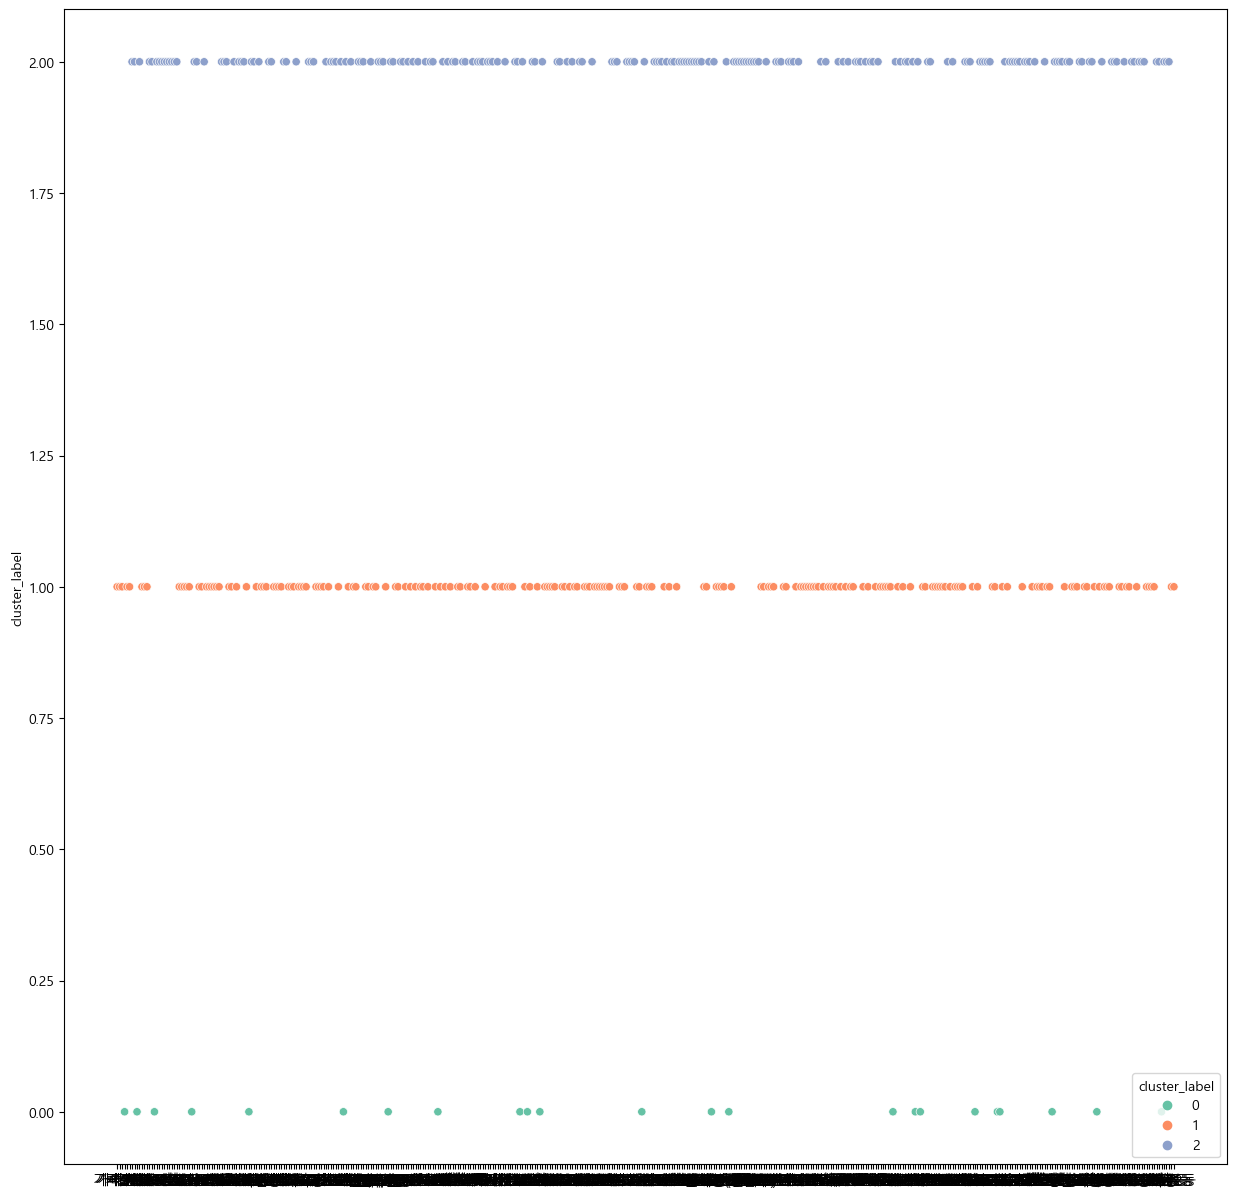

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(x=df.index, y=df['cluster_label'], hue=df['cluster_label'], palette="Set2")
# ax.set(xlabel=xlabel, ylabel=ylabel)
# ax.set_title(title)
# plt.xticks(rotation=45)  
plt.show()